# Heart Disease Analysis - Interm Results

- Nathan Garrity (8767594)
- Jun He
- Mohamed Benkhial 
- Haoyang Li

Our use case for our dataset is to determine **Risk of Heart Disease Prediction**. We can use predictive modeling techniques to assess which variables are the most significant predictors of heart disease and extract patterns from the data. The heart disease dataset is a numerical dataset with 13 key attributes, including age, Systolic blood pressure, Cholesterol, and Gender, used primarily to predict the presence of heart disease. The **Null Hypothesis** is that patient features have no relationship with heart disease. Whereas the **Alternative Hypothesis** is that patient features significantly influences heart disease. 

Our dataset can be used to predict heart disease risk by analyzing factors like age, sex, cholesterol levels, chest pain types, and exercise-induced symptoms. A machine learning model can help identify high-risk individuals based on these symtoms, aiding early diagnosis and personalized treatment plans.

There are 3 types of input features:

- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

#### Data Columns (Source: [Cardiovascular Disease dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?resource=download)):

### Hypothesis Testing

- **Null Hypothesis**: Selected features have no relationship with heart disease.
- **Alternative Hypothesis**: Selected features significantly influences heart disease.


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class HeartDiseaseAnalysis:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        self.df_filtered = None

    def load_data(self):
        """Load data from the provided CSV file path."""
        self.df = pd.read_csv(self.file_path)
        print(f"Data loaded successfully with {self.df.shape[0]} rows and {self.df.shape[1]} columns.")
        return self.df

    def fill_missing_values_by_group(self, df, group_col, categorical_cols, numerical_cols):

        # Fill missing values in numerical columns with the mean, grouped by group_col
        df[numerical_cols] = df.groupby(group_col)[numerical_cols].transform(lambda x: x.fillna(x.mean()))

        # Fill missing values in categorical columns with the mode, grouped by group_col
        for col in categorical_cols:
            df[col] = df.groupby(group_col)[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))

        # Verify if there are any remaining missing values
        print("\nRemaining missing values:")
        print(df.isnull().sum())

In [46]:
# Using functions in HeartDiseaseAnalysis class
analysis = HeartDiseaseAnalysis('data/cardio_train.csv')
df = analysis.load_data() 

Data loaded successfully with 70000 rows and 13 columns.


In [47]:
df.shape

(70000, 13)

In [48]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


## Data Preparation
### Handling Missing Values

In [49]:
# Identify missing values in each column
missing_values = analysis.df.isnull().sum()
print('Missing values in each column:')
missing_values

Missing values in each column:


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [50]:
missing_value_ratio = analysis.df.isnull().mean()

print("Missing Value Ratio for each column:")
print(missing_value_ratio)

threshold = 0.4

columns_to_drop = missing_value_ratio[missing_value_ratio > threshold].index
df_dropped = analysis.df.drop(columns=columns_to_drop)
analysis.df = df_dropped

print("Columns dropped due to high missing value ratio:")
print(columns_to_drop)

print("\nDataFrame after handling missing values:")
df_dropped.head()

Missing Value Ratio for each column:
id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64
Columns dropped due to high missing value ratio:
Index([], dtype='object')

DataFrame after handling missing values:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [51]:
# Import necessary libraries
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")


In [52]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0
5,8,21914,1,151,67,120,80,2,2,0,0,0,0
6,9,22113,1,157,93,130,80,3,1,0,0,1,0
7,12,22584,2,178,95,130,90,3,3,0,0,1,1
8,13,17668,1,158,71,110,70,1,1,0,0,1,0
9,14,19834,1,164,68,110,60,1,1,0,0,0,0


#### Objective Features

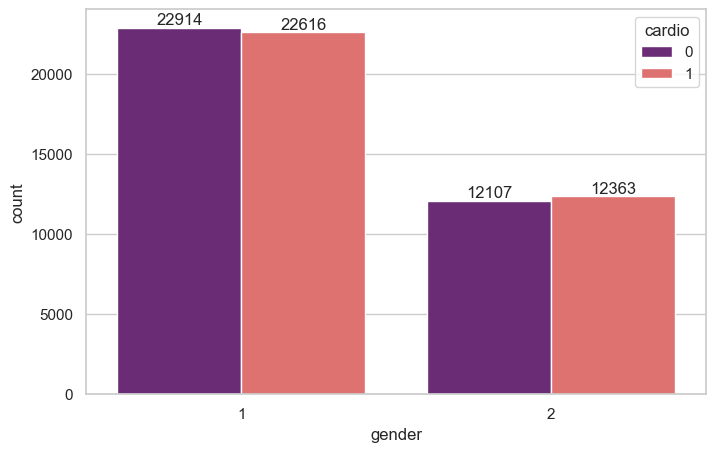

In [53]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data = df,x='gender',hue='cardio',palette = 'magma')
for x in ax.containers:
    ax.bar_label(x)

plt.show()



#### Examination Features

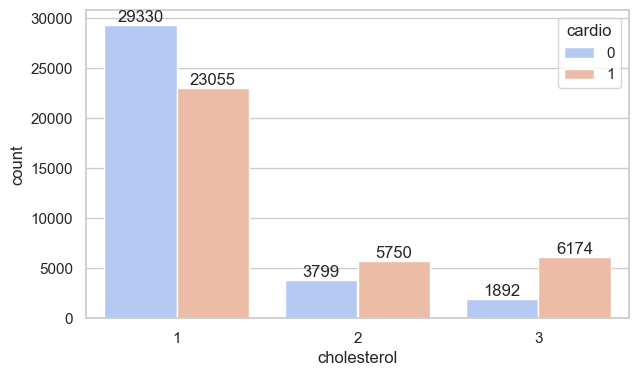

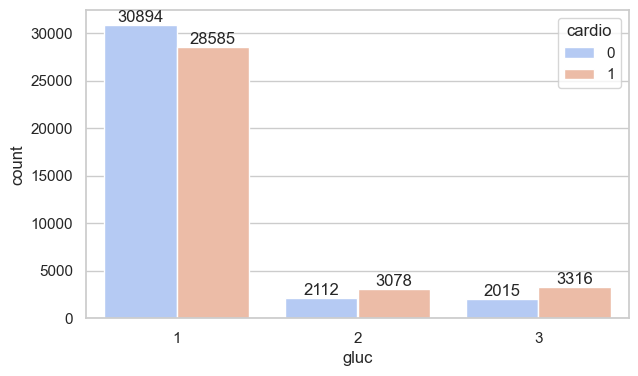

In [54]:
plt.figure(figsize=(7,4))
bx = sns.countplot(x='cholesterol',hue='cardio',data = df,palette = 'coolwarm')
for p in bx.containers:
    bx.bar_label(p)
plt.show()

plt.figure(figsize=(7,4))
cx = sns.countplot(x='gluc',hue='cardio',data = df,palette = 'coolwarm')
for b in cx.containers:
    cx.bar_label(b)
plt.show()

#### Subjective Features

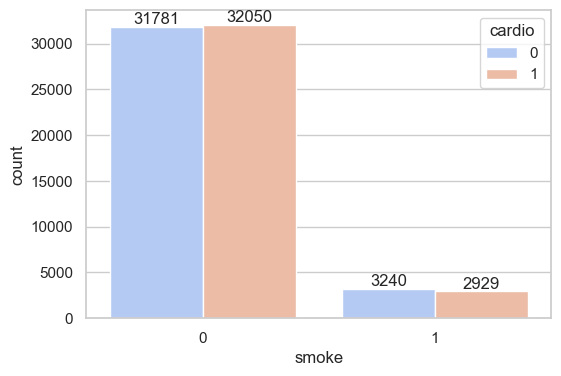

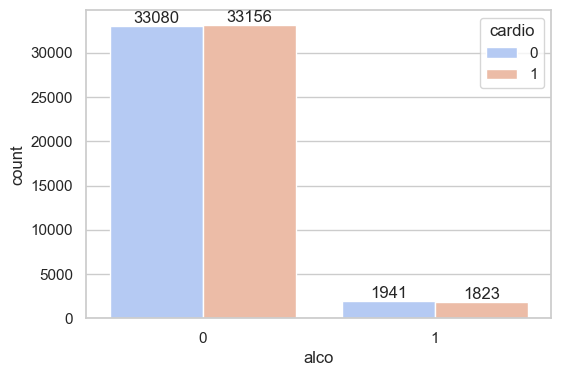

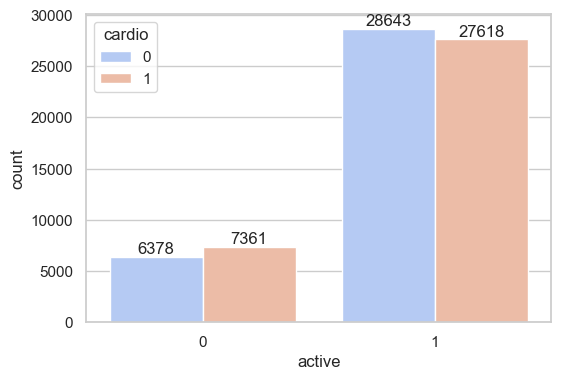

In [55]:
plt.figure(figsize=(6,4))
dx = sns.countplot(x='smoke',hue='cardio',data = df,palette = 'coolwarm')
for b in dx.containers:
    dx.bar_label(b)
plt.show()

plt.figure(figsize=(6,4))
ex = sns.countplot(x='alco',hue='cardio',data = df,palette = 'coolwarm')
for b in ex.containers:
    ex.bar_label(b)
plt.show()

plt.figure(figsize=(6,4))
fx = sns.countplot(x='active',hue='cardio',data = df,palette = 'coolwarm')
for b in fx.containers:
    fx.bar_label(b)
plt.show()

#### Chi-Squared Test
Helps us determine whether there is an association between sex and chest pain type (cp). This can help understand if certain chest pain types are more prevalent in one gender.

In [56]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['gender'], df['cholesterol'])

# Performs the Chi-Squared test on the two columns
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic (χ²): {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected frequencies: \n{expected}")
print(f"Observed frequencies: \n{contingency_table}")

# Hypothesis testing
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. Gender and cholesterol are not independent (there is an association between them)")
else:
    print("Fail to reject the null hypothesis. Gender and cholesterol are independent (there is no association between them)")

Chi-squared statistic (χ²): 90.82314741409652
P-Value: 1.8967239342754586e-20
Degrees of Freedom: 2
Expected frequencies: 
[[34072.70071429  6210.94242857  5246.35685714]
 [18312.29928571  3338.05757143  2819.64314286]]
Observed frequencies: 
cholesterol      1     2     3
gender                        
1            33570  6403  5557
2            18815  3146  2509
Reject the null hypothesis. Gender and cholesterol are not independent (there is an association between them)


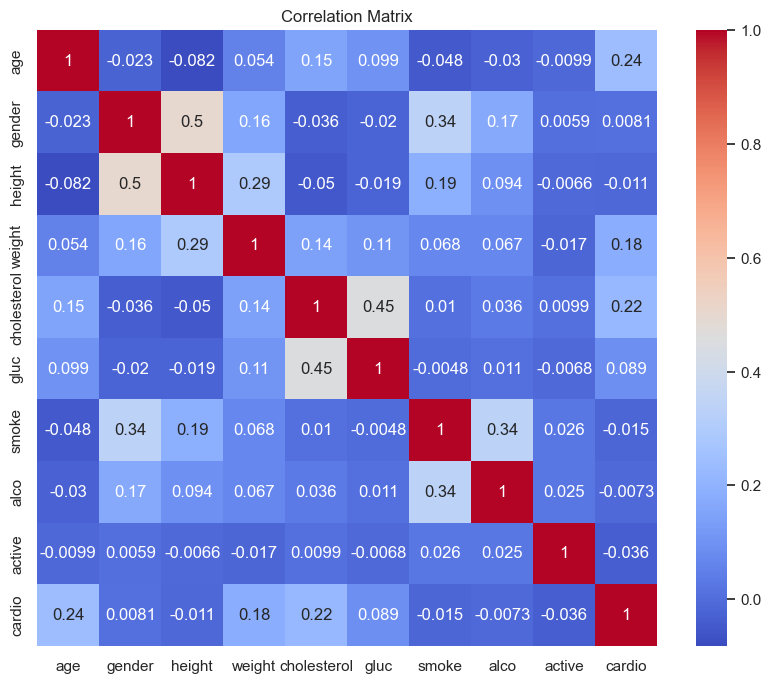

In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson's correlation
correlation_matrix = df[['age', 'gender', 'height', 'weight', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Logistic Classification

For our logistic regression model, 0 represents a paient does not have heart disease, while 1 means a patient does have heart disease.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

selected_features = ['age', 'weight', 'cholesterol', 'ap_hi', 'ap_lo', 'gluc', 'smoke', 'alco', 'active']
X = df[selected_features]
y = df['cardio']

# Add a constant term for the intercept in statsmodels
X = sm.add_constant(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
log_model = sm.Logit(y_train, X_train).fit()

# Predict on the test set
y_pred = log_model.predict(X_test)
y_pred_class = (y_pred >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_class))

Optimization terminated successfully.
         Current function value: 0.600022
         Iterations 7
Accuracy: 0.7212380952380952


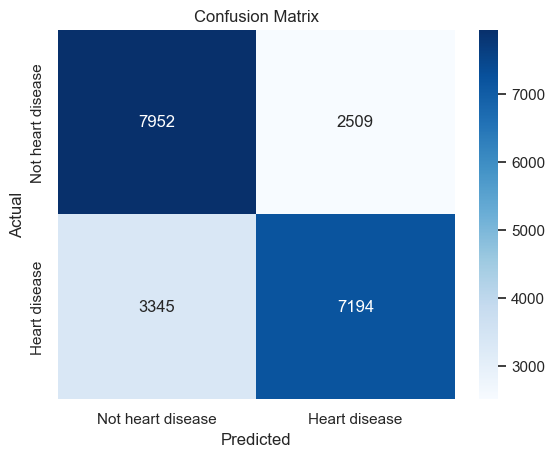

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not heart disease', 'Heart disease'], yticklabels=['Not heart disease', 'Heart disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Components of the Confusion Matrix

**Cell Values:**

- 7952 (True Negatives): The model correctly predicted "Not Heart Disease" for 7952 instances.
- 7194 (True Positives): The model correctly predicted "Heart Disease" for 7194 instances.
- 2509 (False Positives): The model incorrectly predicted "Heart Disease" for instances that are actually "Not Heart Disease."
- 3345 (False Negatives): The model incorrectly predicted "Not Heart Disease" for instances that are actually "Heart Disease."

In [60]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))


Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73     10461
           1       0.74      0.68      0.71     10539

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



#### **Overall Metrics**

Accuracy: The ratio of correctly predicted observations to the total observations.

- Value: 0.72
- Interpretation: The model correctly predicts 72% of the instances in the dataset.

In [61]:
# Display model summary
print(log_model.summary())

                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                49000
Model:                          Logit   Df Residuals:                    48990
Method:                           MLE   Df Model:                            9
Date:                Tue, 11 Mar 2025   Pseudo R-squ.:                  0.1343
Time:                        01:07:06   Log-Likelihood:                -29401.
converged:                       True   LL-Null:                       -33964.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.8964      0.121    -73.349      0.000      -9.134      -8.659
age             0.0002    4.2e-06     36.096      0.000       0.000       0.000
weight          0.0144      0.001     19.399    

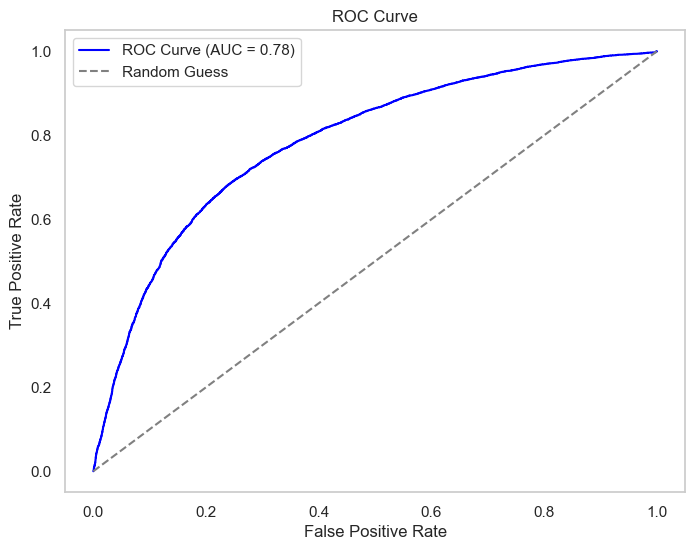

In [62]:
 # ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities on the test set
X_test_selected = sm.add_constant(X_test[selected_features])
y_pred_prob = log_model.predict(X_test_selected)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

In [63]:
y_prob_positive = log_model.predict(X_test)

y_prob_negative = 1 - y_prob_positive
 
# Combine into a 2D array for both classes
import numpy as np
y_prob = np.column_stack((y_prob_negative, y_prob_positive))
 
# Display predicted probabilities for the first 5 instances
print("Predicted probabilities for the first 5 instances (Negative and Positive classes):")
print(y_prob[:5])

Predicted probabilities for the first 5 instances (Negative and Positive classes):
[[0.26185675 0.73814325]
 [0.17973092 0.82026908]
 [0.32146295 0.67853705]
 [0.50925252 0.49074748]
 [0.65910311 0.34089689]]


In [64]:
# Get predicted probabilities
y_pred_probs = log_model.predict(X_test)

# Example of interpreting probabilities
X_test['Predicted Probability'] = y_pred_probs
X_test.head()

,const,age,weight,cholesterol,ap_hi,ap_lo,gluc,smoke,alco,active,Predicted Probability
46730,1.0,21770,64,2,140,80,1,0,0,1,0.738143
48393,1.0,21876,85,1,160,90,1,0,0,1,0.820269
41416,1.0,23270,90,1,130,80,1,0,0,1,0.678537
34506,1.0,19741,97,1,120,80,1,0,0,1,0.490747
43725,1.0,18395,68,1,120,80,1,0,0,1,0.340897


In [65]:
X_test['Risk Level'] = pd.cut(
    y_pred_probs,
    bins=[0, 0.3, 0.7, 1],
    labels=['Low', 'Medium', 'High']
)

X_test.head()

,const,age,weight,cholesterol,ap_hi,ap_lo,gluc,smoke,alco,active,Predicted Probability,Risk Level
46730,1.0,21770,64,2,140,80,1,0,0,1,0.738143,High
48393,1.0,21876,85,1,160,90,1,0,0,1,0.820269,High
41416,1.0,23270,90,1,130,80,1,0,0,1,0.678537,Medium
34506,1.0,19741,97,1,120,80,1,0,0,1,0.490747,Medium
43725,1.0,18395,68,1,120,80,1,0,0,1,0.340897,Medium


### Conclusion

In conclusion, we have determined that based on our analysis that there are key factors that significantly contribute to heart disease. Factors such as age, cholesterol, weight, glucose, and others all significantly indicate weather a patient has a risk of heart disease.

The predicted probabilities can help designate the risk level to each patients who don't suffer from heart disease currently, in hopes of saving lives down the line.